# Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- " %matplotlib inline " makes life easy by returning output plots without needing to write plt.show() code everytime after each plot!

# Loading dataset

In [53]:
df = pd.read_csv('../../ML-API/python-app/winequality-white.csv',sep=';')
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


- Original data is seperated by delimiter " ; " in given dataset
- " .head() " returns first five observations of the dataset

# Data Insights

In [54]:
df.shape

(4898, 12)

- dataset comprises of 4898 observations and 12 chracteriestics 
- out of which one is dependent variable and rest 11 are independent variables - physicochemical characteristics

In [55]:
df.columns.values 

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

- Label of each column

In [56]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- Data has only float and integer values
- No variable column has null/missing values

# Summary Statistics

In [57]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#Key Observations - 
- Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
- Notably large differnece in 75th %tile and max values of predictors "residual sugar","free sulfur dioxide","total sulfur dioxide"
- Thus observations 1 and 2 suggests that there are extreme values-Outliers in our dataset

# Understanding Target variable

In [58]:
df.quality.unique() 

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

- Target variable/Dependent variable is discrete and categorical in nature.
- "quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
- 1,2 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 9.

In [59]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

- This tells us vote count of each quality score in descending order.
- "quality" has most values concentrated in the categories 5, 6 and 7.
- Only a few observations made for the categories 3 & 9 

# Data Visualization

# To check missing values

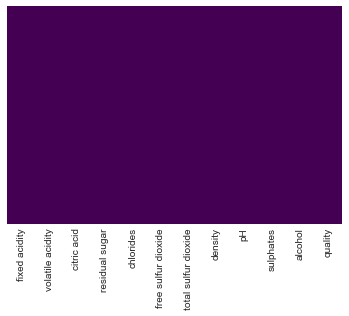

In [60]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

- Dataset has no missing values.
- If there were any, you would've noticed in figure represented by different colour shade on purple background.

# To check correlation

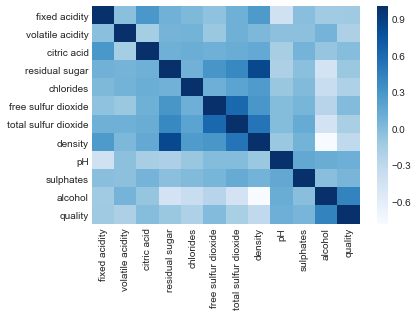

In [61]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

- Dark shades represents positive correlation while lighter shades represents negative correlation.

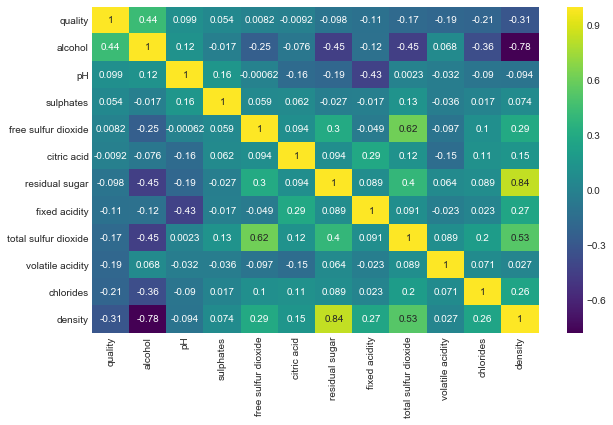

In [62]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

- Here we can infer that "density" has strong positive correlation with "residual sugar" whereas it has strong negative correlation with "alcohol".
- "free sulphur dioxide" and "citric acid" has almost no correlation with "quality"
- Since correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you're applying Linear Regression model to the dataset. 

# To check Outliers

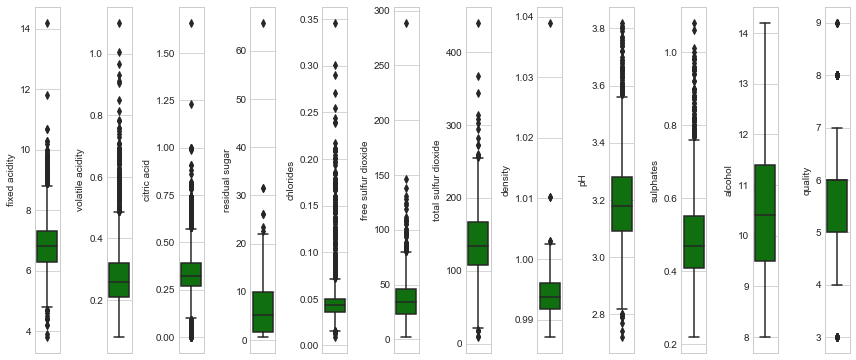

In [63]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()


- Except "alcohol" all other features columns shows outliers.

# To check distribution-Skewness

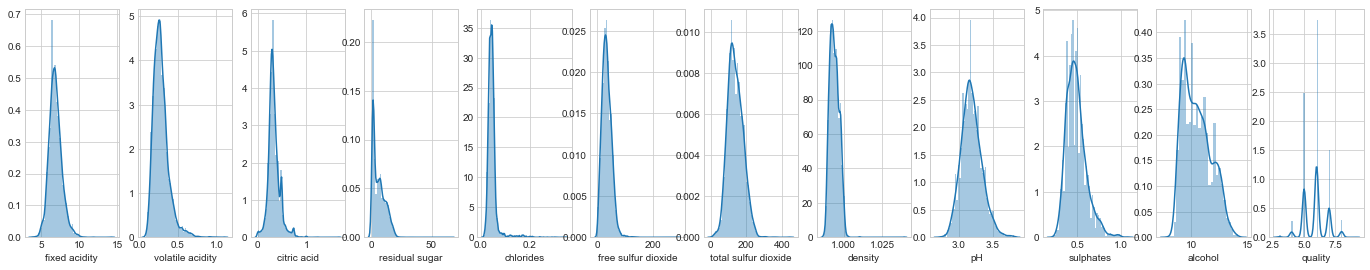

In [64]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 


- "pH" column appears to be normally distributed
- remaining all independent variables are right skewed/positively skewed.   